In [1]:
'''
meanings of the features
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------------------------

The target is a binary classification label:

0 → malignant (cancerous)
1 → benign (non-cancerous)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Feature Categories:

- Mean — average value of the feature for each cell nucleus.
- Standard Error (SE) — variation (uncertainty) in the feature across the sample.
- Worst — largest mean value of the feature in the three worst (largest/baddest) cells in the sample.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Base Feature Definitions:

Base Feature --------------------->  Description
radius --------------------------->	Mean distance from center to points on the perimeter
texture -------------------------->	Standard deviation of gray-scale values
perimeter ------------------------>	Perimeter of the nucleus
area ----------------------------->	Area of the nucleus
smoothness ----------------------->	Local variation in radius lengths
compactness ---------------------->	Perimeter^2 / area - 1
concavity ------------------------> Severity of concave portions of the contour
concave points -------------------> Number of concave portions of the contour
symmetry -------------------------> How symmetrical the nucleus is
fractal dimension ----------------> "Coastline approximation" — complexity of the contour
'''

'\nmeanings of the features\n------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n------------------------------------------------------------------------------------------------------------------------------------------------------------------------\n\nThe target is a binary classification label:\n\n0 → malignant (cancerous)\n1 → benign (non-cancerous)\n\n------------------------------------------------------------------------------------------------------------------------------------------------------------------------\nFeature Categories:\n\n- Mean — average value of the feature for each cell nucleus.\n- Standard Error (SE) — variation (uncertainty) in the feature across the sample.\n- Worst — largest mean value of the feature in the three worst (largest/baddest) cells in the sample.\n\n---------------------------------------------------------------------------------

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(as_frame=True, return_X_y=True)

In [5]:
df_full = pd.concat([X, y], axis=1)

In [6]:
df_full

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [7]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

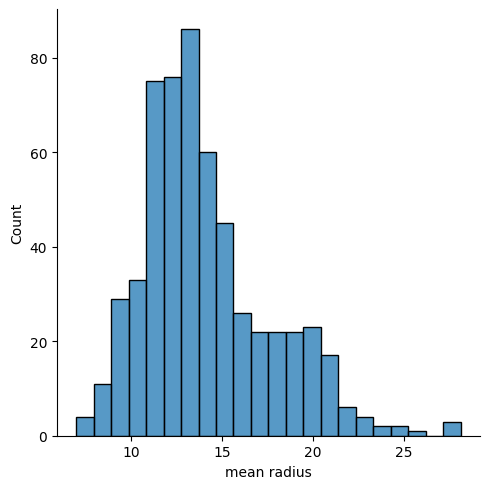

In [8]:
sns.displot(
    data=df_full,
    x='mean radius',
    # hue='target'
)

In [9]:
df_mean = df_full.filter(regex='mean|target')
df_error = df_full.filter(regex='error|target')
df_worst = df_full.filter(regex='worst|target')

[Text(0.5, 0, 'mean radius'),
 Text(1.5, 0, 'mean texture'),
 Text(2.5, 0, 'mean perimeter'),
 Text(3.5, 0, 'mean area'),
 Text(4.5, 0, 'mean smoothness'),
 Text(5.5, 0, 'mean compactness'),
 Text(6.5, 0, 'mean concavity'),
 Text(7.5, 0, 'mean concave points'),
 Text(8.5, 0, 'mean symmetry'),
 Text(9.5, 0, 'mean fractal dimension'),
 Text(10.5, 0, 'target')]

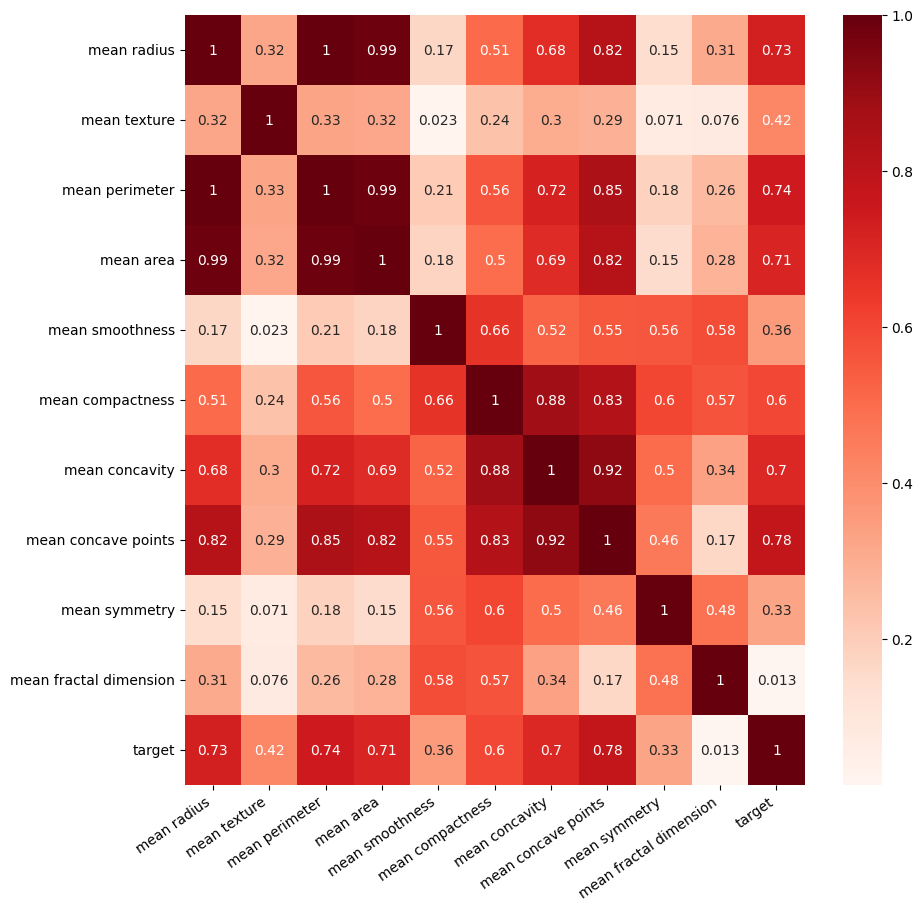

In [10]:
ax, fix = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(
    abs(df_mean.corr()),
    annot=True,
    cmap='Reds',
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')

In [11]:
####################################################################################################################################################################################
#### Because of the high correlation between 'radius' and 'mean perimeter , mean area' (which is reasonable), we can remove the other two features and just keep the 'radius'.  ####
#### Because of the high correlation between 'concave points' and 'concavity' (which is reasonable), we can remove one of them.                                                 ####
####################################################################################################################################################################################

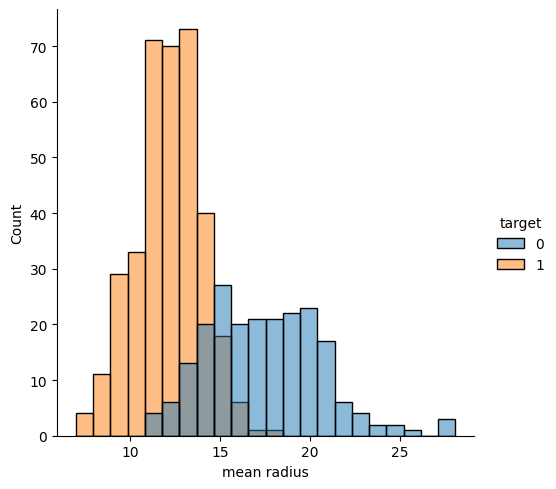

In [12]:
sns.displot(
    data=df_mean,
    x='mean radius',
    hue='target',
)

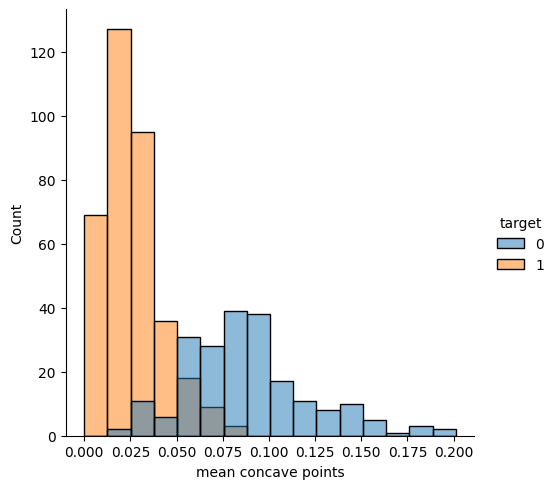

In [13]:
sns.displot(
    data=df_mean,
    x='mean concave points',
    hue='target',
)

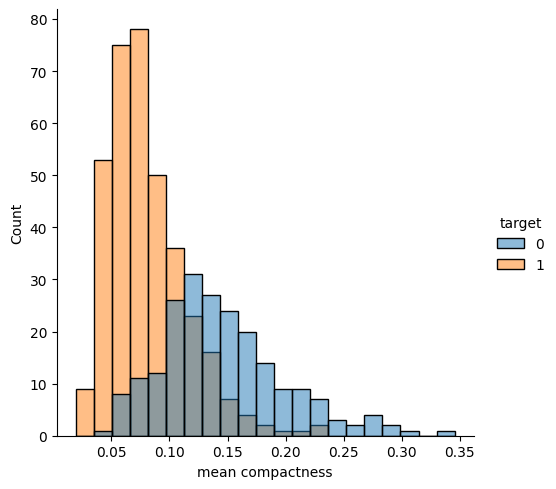

In [14]:
sns.displot(
    data=df_mean,
    x='mean compactness',
    hue='target',
)

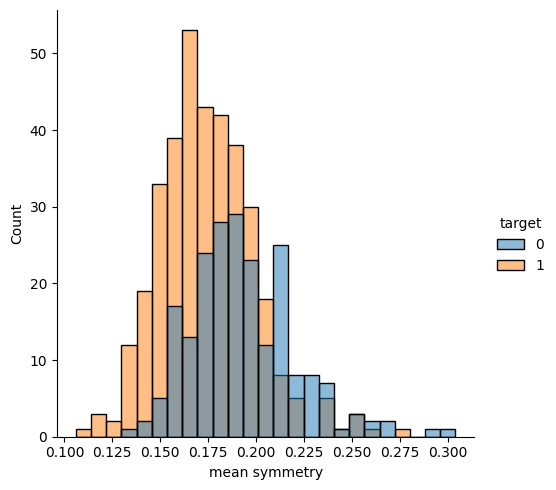

In [15]:
sns.displot(
    data=df_mean,
    x='mean symmetry',
    hue='target',
)

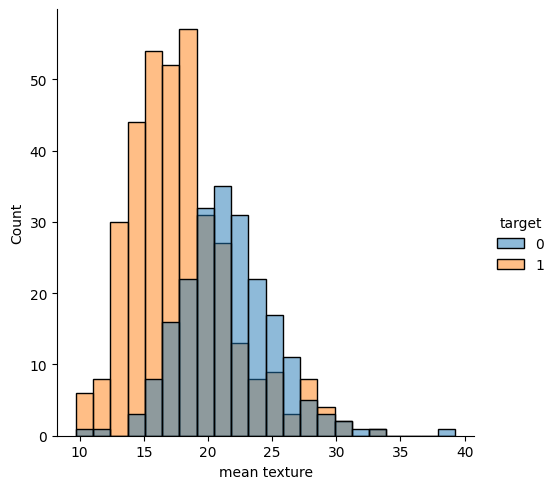

In [16]:
sns.displot(
    data=df_mean,
    x='mean texture',
    hue='target',
)

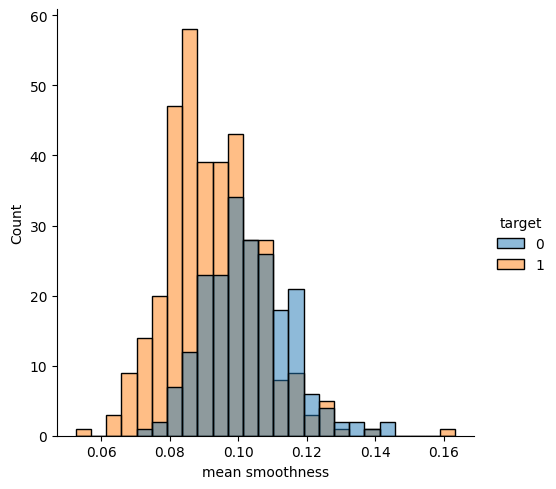

In [17]:
sns.displot(
    data=df_mean,
    x='mean smoothness',
    hue='target',
)

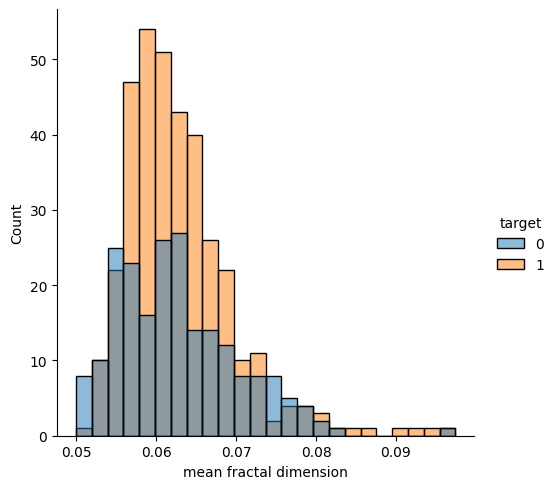

In [18]:
sns.displot(
    data=df_mean,
    x='mean fractal dimension',
    hue='target',
)

[Text(0.5, 0, 'radius error'),
 Text(1.5, 0, 'texture error'),
 Text(2.5, 0, 'perimeter error'),
 Text(3.5, 0, 'area error'),
 Text(4.5, 0, 'smoothness error'),
 Text(5.5, 0, 'compactness error'),
 Text(6.5, 0, 'concavity error'),
 Text(7.5, 0, 'concave points error'),
 Text(8.5, 0, 'symmetry error'),
 Text(9.5, 0, 'fractal dimension error'),
 Text(10.5, 0, 'target')]

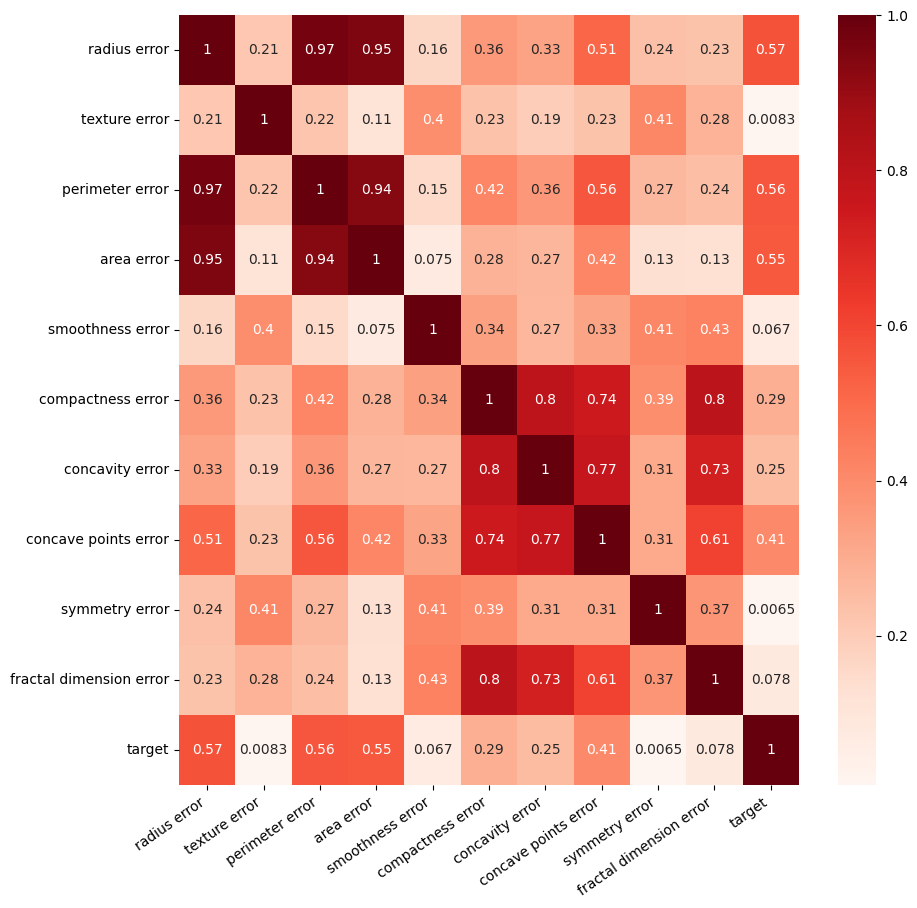

In [19]:
ax, fig = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(
    abs(df_error.corr()),
    annot=True,
    cmap='Reds',
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')

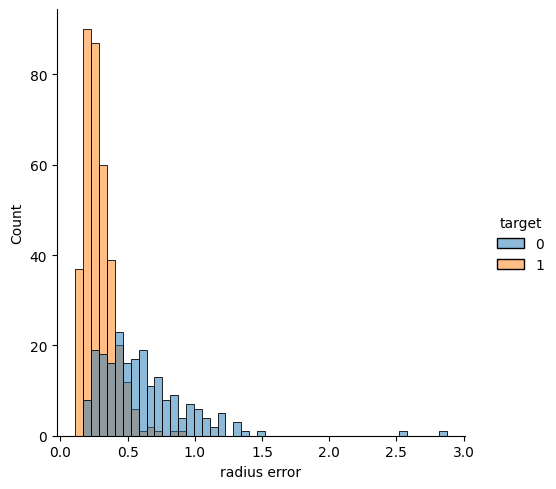

In [20]:
sns.displot(
    data=df_error,
    x='radius error',
    hue='target',
)

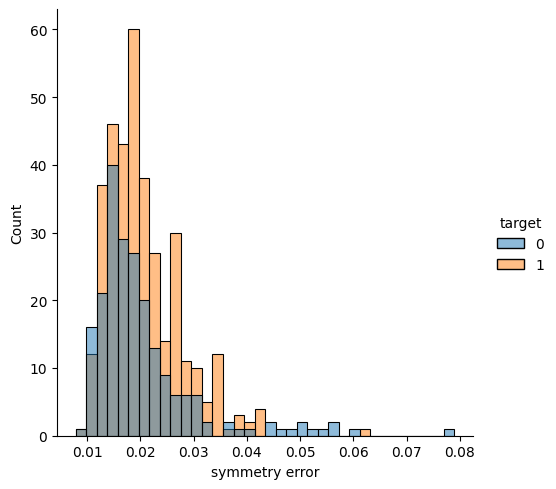

In [21]:
sns.displot(
    data=df_error,
    x='symmetry error',
    hue='target',
)

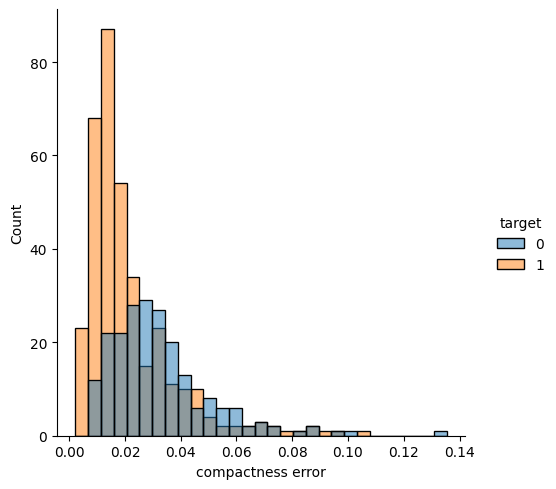

In [22]:
sns.displot(
    data=df_error,
    x='compactness error',
    hue='target',
)

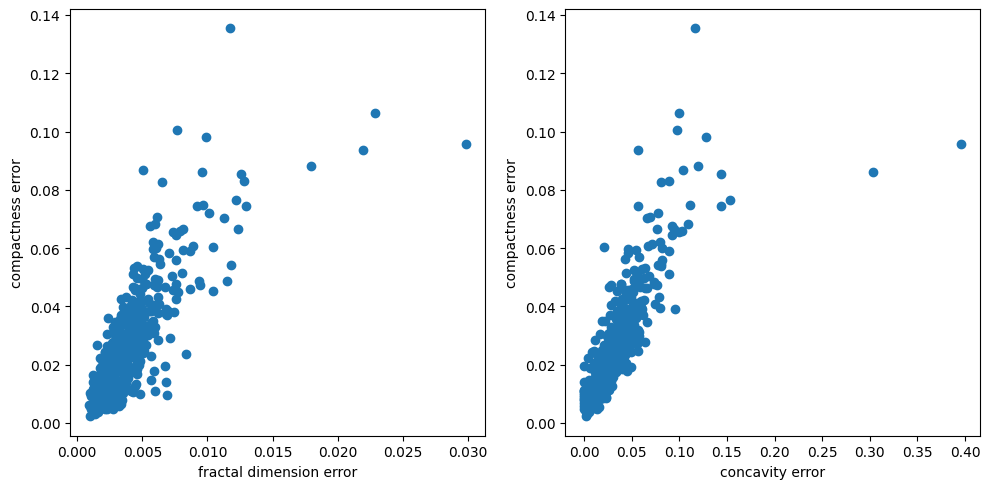

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.scatter(df_error['fractal dimension error'], df_error['compactness error'])
ax1.set_xlabel('fractal dimension error')
ax1.set_ylabel('compactness error')

ax2.scatter(df_error['concavity error'], df_error['compactness error'])
ax2.set_xlabel('concavity error')
ax2.set_ylabel('compactness error')


plt.tight_layout()
plt.show()

[Text(0.5, 0, 'worst radius'),
 Text(1.5, 0, 'worst texture'),
 Text(2.5, 0, 'worst perimeter'),
 Text(3.5, 0, 'worst area'),
 Text(4.5, 0, 'worst smoothness'),
 Text(5.5, 0, 'worst compactness'),
 Text(6.5, 0, 'worst concavity'),
 Text(7.5, 0, 'worst concave points'),
 Text(8.5, 0, 'worst symmetry'),
 Text(9.5, 0, 'worst fractal dimension'),
 Text(10.5, 0, 'target')]

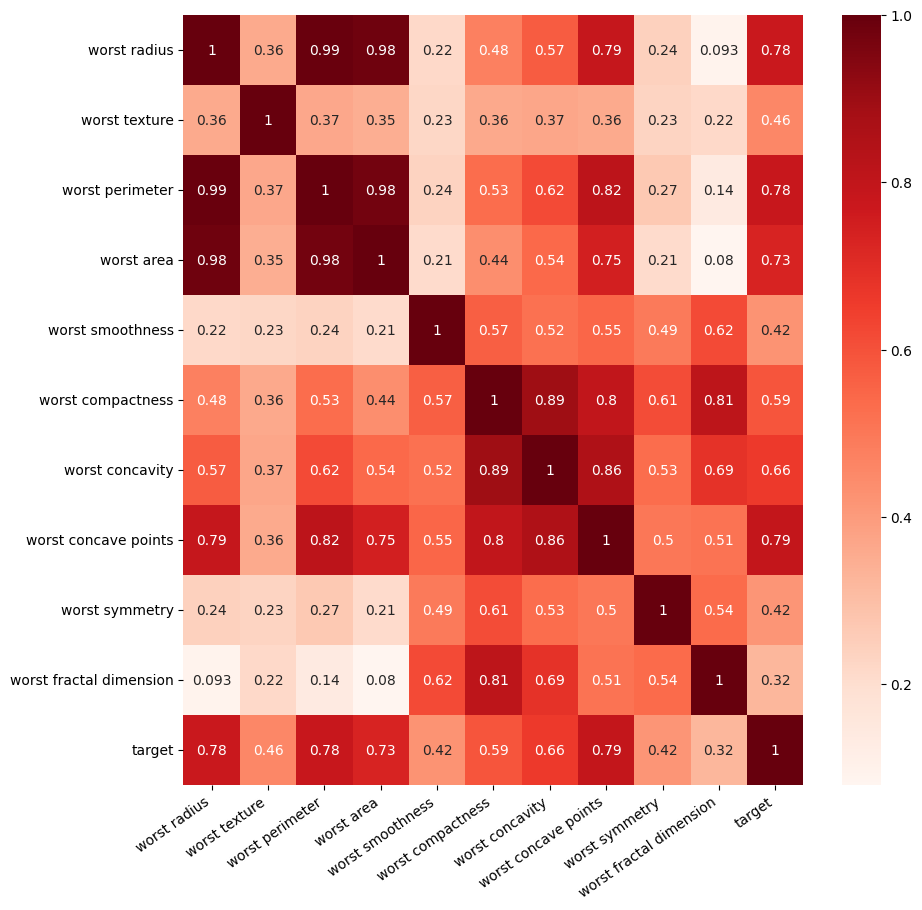

In [24]:
ax, fig = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(
    abs(df_worst.corr()),
    annot=True,
    cmap='Reds',
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')

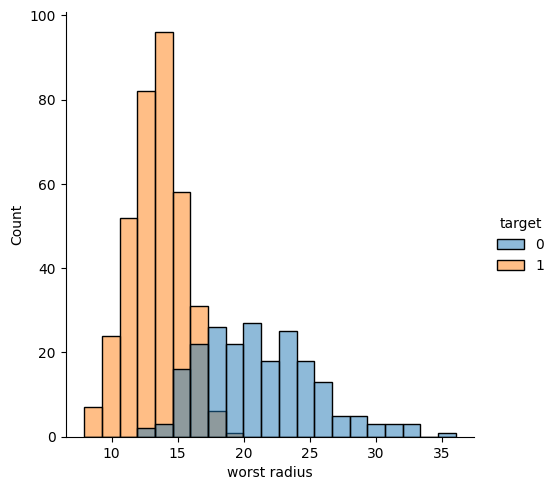

In [25]:
sns.displot(
    data=df_worst,
    x='worst radius',
    hue='target',
)

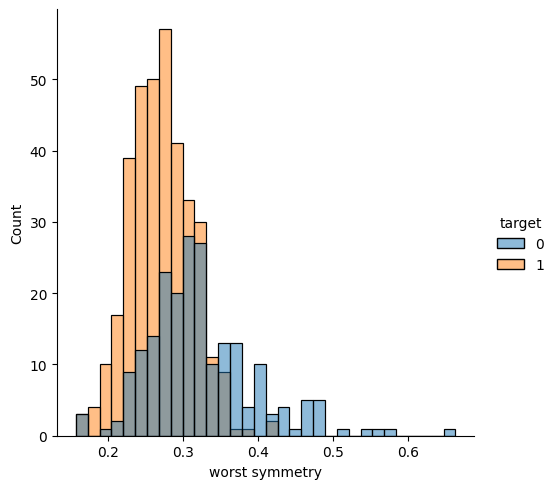

In [26]:
sns.displot(
    data=df_worst,
    x='worst symmetry',
    hue='target',
)

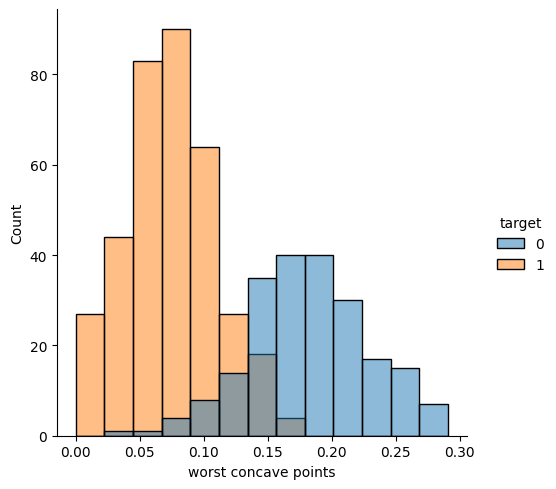

In [27]:
sns.displot(
    data=df_worst,
    x='worst concave points',
    hue='target',
)

[Text(0.5, 0, 'mean radius'),
 Text(1.5, 0, 'mean texture'),
 Text(2.5, 0, 'mean perimeter'),
 Text(3.5, 0, 'mean area'),
 Text(4.5, 0, 'mean smoothness'),
 Text(5.5, 0, 'mean compactness'),
 Text(6.5, 0, 'mean concavity'),
 Text(7.5, 0, 'mean concave points'),
 Text(8.5, 0, 'mean symmetry'),
 Text(9.5, 0, 'mean fractal dimension'),
 Text(10.5, 0, 'radius error'),
 Text(11.5, 0, 'texture error'),
 Text(12.5, 0, 'perimeter error'),
 Text(13.5, 0, 'area error'),
 Text(14.5, 0, 'smoothness error'),
 Text(15.5, 0, 'compactness error'),
 Text(16.5, 0, 'concavity error'),
 Text(17.5, 0, 'concave points error'),
 Text(18.5, 0, 'symmetry error'),
 Text(19.5, 0, 'fractal dimension error'),
 Text(20.5, 0, 'target')]

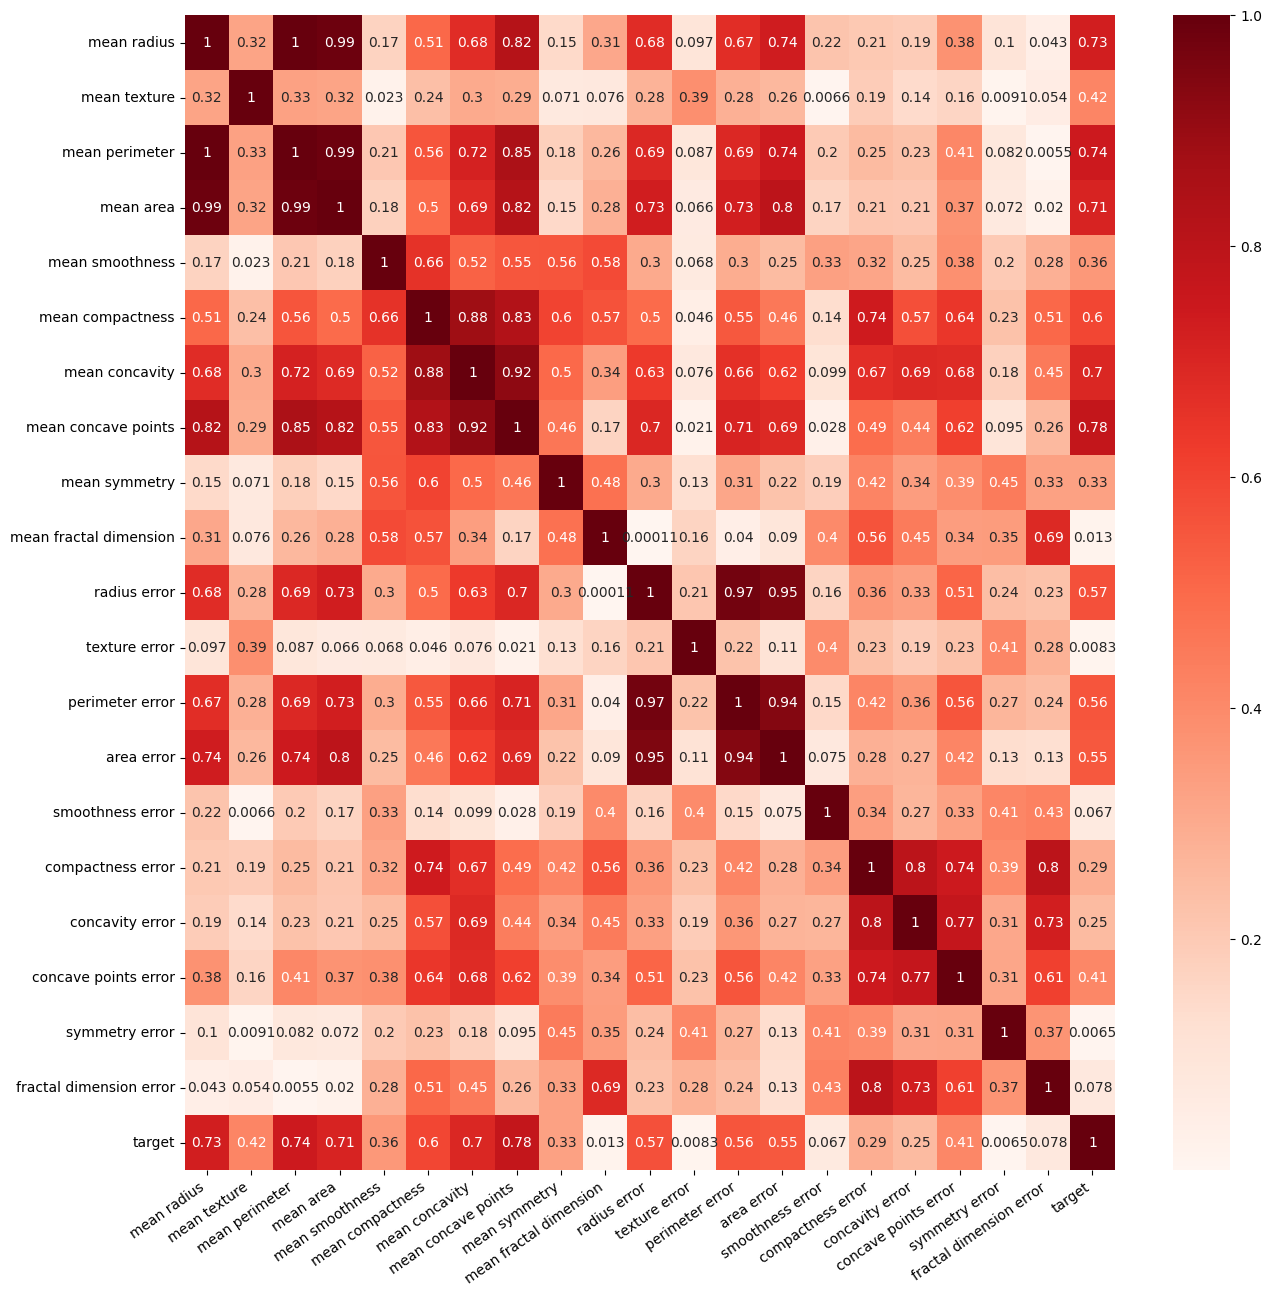

In [28]:
ax, fig = plt.subplots(figsize=(15, 15))


corr = abs(df_full.filter(regex='mean|error|target').corr())
ax = sns.heatmap(
    corr,
    annot=True,
    cmap='Reds',
)

ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha='right')

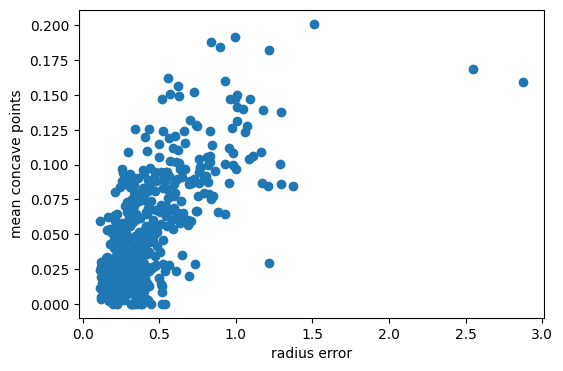

In [29]:
fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.scatter(df_full['radius error'], df_full['mean concave points'])
ax1.set_xlabel('radius error')
ax1.set_ylabel('mean concave points')

plt.show()